In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import matplotlib.pyplot as plt

In [2]:
sequence = np.array([i for i in range(1,101)])

In [3]:
window_size=3
x=[]
y=[]
for i in range(len(sequence)-window_size):
    x.append(sequence[i:i+window_size])
    y.append(sequence[i+window_size])

In [4]:
x=np.array(x)
y=np.array(y)

In [5]:
x=x.reshape((x.shape[0],x.shape[1],1))

In [6]:
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(x,y,epochs=200,verbose=0)

In [8]:
model.save('prediction of nexr number in range of 1 to 100 using LSTM algorithm.h5')

In [9]:
from keras.models import load_model
model = load_model('prediction of nexr number in range of 1 to 100 using LSTM algorithm.h5')  # Update path if uploaded elsewhere
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [10]:
test_input=np.array([88,89,90])
test_input=test_input.reshape((1,window_size,1))
predicted_model= model.predict(test_input,verbose=0)
print(predicted_model)

[[91.04428]]


In [11]:
y_pred=model.predict(x)
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
[[  2.780616 ]
 [  4.207179 ]
 [  5.6616187]
 [  7.0480824]
 [  8.315685 ]
 [  9.454376 ]
 [ 10.482425 ]
 [ 11.432903 ]
 [ 12.340269 ]
 [ 13.232518 ]
 [ 14.128822 ]
 [ 15.040134 ]
 [ 15.971178 ]
 [ 16.922556 ]
 [ 17.892328 ]
 [ 18.877766 ]
 [ 19.87561  ]
 [ 20.882696 ]
 [ 21.896847 ]
 [ 22.915264 ]
 [ 23.93576  ]
 [ 24.956842 ]
 [ 25.97739  ]
 [ 26.996603 ]
 [ 28.013945 ]
 [ 29.029081 ]
 [ 30.04185  ]
 [ 31.05221  ]
 [ 32.060215 ]
 [ 33.065987 ]
 [ 34.06969  ]
 [ 35.071526 ]
 [ 36.071705 ]
 [ 37.07045  ]
 [ 38.06798  ]
 [ 39.064514 ]
 [ 40.060253 ]
 [ 41.055386 ]
 [ 42.050102 ]
 [ 43.044537 ]
 [ 44.03884  ]
 [ 45.03315  ]
 [ 46.027565 ]
 [ 47.02218  ]
 [ 48.01707  ]
 [ 49.012302 ]
 [ 50.00793  ]
 [ 51.003998 ]
 [ 52.000526 ]
 [ 52.99753  ]
 [ 53.99503  ]
 [ 54.99303  ]
 [ 55.991528 ]
 [ 56.990513 ]
 [ 57.989952 ]
 [ 58.989853 ]
 [ 59.990166 ]
 [ 60.99088  ]
 [ 61.991947 ]
 [ 62.99337  ]
 [ 63.995087 ]
 [ 64.99709  ]
 [ 65.99931  ]
 [ 67.001755 ]
 

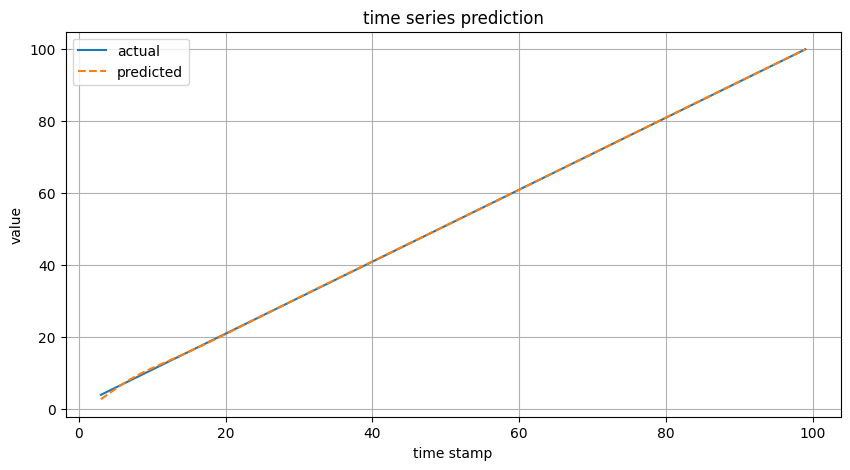

In [12]:
plt.figure(figsize=(10,5))
plt.plot(range(window_size,len(sequence)),y,label='actual')
plt.plot(range(window_size,len(sequence)),y_pred.flatten(),label='predicted',linestyle='--')
plt.title('time series prediction')
plt.xlabel('time stamp')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.show()